請輸入光密介質折射率
1.48
請輸入光密介質折射率
1.0
全反射臨界角為： 42.507
建議輸入的入射角角度需小於 47.493
請輸入曲率半徑
100.0
請輸入入射角角度
5.0
請輸入光纖直徑寬度
10.0
請輸入光纖直線距離
800.0
請輸入彎道角度
75.0
( 0 , 105.009 ) ,slope= -0.087


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:93: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


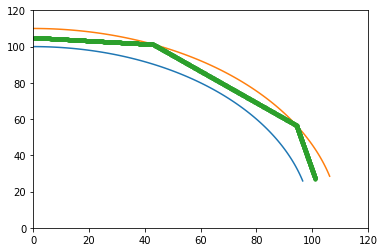

( 101.109 , 27.092 )
Out Angle: 2.045 Corrected Length: 270.931
資訊成功傳輸


In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
#1
s_n1=input("請輸入光密介質折射率")
if s_n1=="":
    s_n1=1.48
n1=float(s_n1)
print(n1)

s_n2=input("請輸入光密介質折射率")
if s_n2=="":
    s_n2=1
n2=float(s_n2)
print(n2)

c=math.degrees(math.asin(n2/n1))
print("全反射臨界角為：",round(c,3))
print("建議輸入的入射角角度需小於",round(90-c,3))

#R1=float(input("請輸入外圓曲率半徑")) #大圓半徑
s_R2=input("請輸入曲率半徑")  #小圓半徑
if s_R2=="":
    s_R2=100
R2=float(s_R2)
print(R2)

critheta = math.asin(n2/n1)
Thetas=[]


s_ina=input("請輸入入射角角度") #incident angle
if s_ina=="":
    s_ina=5
ina=float(s_ina)
print(ina)

s_w=input("請輸入光纖直徑寬度")  #diameter of optical fiber 
if s_w=="":
    s_w=10
w=float(s_w)
print(w)
R1=w+R2
s_L=input("請輸入光纖直線距離")#distance from source to turn
if s_L=="":
    s_L=800
L=float(s_L)
print(L)

s_ThesaTurn=input("請輸入彎道角度")
if s_ThesaTurn=="":
    s_ThesaTurn=75
ThesaTurn=float(s_ThesaTurn)
print(ThesaTurn)

#2
x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
num=(L-(w/2)*(1/math.tan(math.radians(ina))))//(w*(1/math.tan(math.radians(ina))))#reflection number
if num%2==1:
    x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
    y=x*math.tan(math.radians(ina))+R2
    m=math.tan(math.radians(ina))
    x=0     
    print("(",x,",",round(y,3),")",",slope=",round(m,3))
else:
    x=(L-(w/2)*(1/math.tan(math.radians(ina))))%(w*(1/math.tan(math.radians(ina))))#lastpath
    y=w-(x*math.tan(math.radians(ina)))+R2
    m=-math.tan(math.radians(ina))
    x=0     
    print("(",x,",",round(y,3),")",",slope=",round(m,3))

#3
C1=0    #常數
L_L=1
B=0

n_2=y   #優化設定
n_1=x
A=[]  #斜率
X=[]  #X座標
Y=[]  #Y座標
K=[]
Test_x=x
Test_y=y
t=math.atan(m) #斜率與正向X軸的角度
i=Symbol('i')
j=Symbol('j')
sol = []
dis = []


Q=np.linspace(0,math.radians(ThesaTurn),R2) #畫參考光纖管
V1_x=R2*np.cos(math.pi/2-Q)
V1_y=R2*np.sin(math.pi/2-Q)
V2_x=R1*np.cos(math.pi/2-Q)
V2_y=R1*np.sin(math.pi/2-Q)

while B<=30:  #畫路徑
    Test_x=x+L_L*1/((abs(m)**2+1)**(1/2))
    Test_y=m*(Test_x-n_1)+n_2
    if (Test_y**2+Test_x**2)**(1/2)>R1 or (Test_y**2+Test_x**2)**(1/2)<R2:
        L_L=L_L*(-1)
    while (y**2+x**2)**(1/2)<=(R1+C1) and (y**2+x**2)**(1/2)>=(R2-C1):
        x+=L_L*0.1/((abs(m)**2+1)**(1/2))
        y=m*(x-n_1)+n_2
        X.append(x)
        Y.append(y)
        if Y[-1]/X[-1]<=math.tan(math.radians(90-ThesaTurn)):
            break
        K.append((y**2+x**2)**(1/2))
        if (y**2+x**2)**(1/2)<=R1 and (y**2+x**2)**(1/2)>=R2:
            C1=0
    if y<R2*math.sin(math.radians(90-ThesaTurn))+w:
        break
    if y>0:
        if (K[-1] > (R1+R2)/2):
            dic = solve([i**2+j**2-R1**2, j-m*(i-X[-1])-Y[-1]], [i,j], dict = True)
        else :
            dic = solve([i**2+j**2-R2**2, j-m*(i-X[-1])-Y[-1]], [i,j], dict = True)
        for k in range(len(dic)):
                dis.append((dic[k][i] - x)**2+(dic[k][j]-y)**2)
        mini = dis[0]
        index = 0
        for k in range(len(dis)):
            if (dis[k]<mini):
                index = k
        sol.append(dic[k])            
    x = sol[0][i]
    y = sol[0][j]
    p_m=-x/y  #球的平面斜率
    n_2=y
    n_1=x
    C1=10
    theta=math.atan((m-p_m)/(1+m*p_m))  #求2斜率者間的角度
    T=math.pi/2-abs(theta)
    Thetas.append(T)
    if Thetas[-1]<critheta:
        break
    t=t-2*theta
    m=math.tan(t)
    B+=1
    if Y[-1]/X[-1]<=math.tan(math.radians(90-ThesaTurn)):
        break
    A.append(m)
    dis = []
    sol = []

#print(m)
#print(A)
#print(T)
#print(t)    
#print(x,y)
#print(X)
#print(Y)
plt.plot(V1_x,V1_y) #畫圖
plt.plot(V2_x,V2_y)
plt.plot(X,Y,'.')    
plt.xlim(0,R1+w)
plt.ylim(0,R1+w)
plt.show()

Last_point=(X[-1],Y[-1])


x=Symbol('x')
y=Symbol('y')

if len(A)==0:
    print('彎道資訊損失')
else:
    function_line=y-Y[-1]-A[-1]*(x-X[-1])
    dic=solve([y-math.tan(math.radians(90-ThesaTurn))*x,y-Y[-1]-A[-1]*(x-X[-1])],[x, y])
    mLast=A[-1]
    a=dic[x]
    b=dic[y]
    print("(",round(a,3),",",round(b,3),")")
    ThesaLine=math.atan(mLast)
    r=(a**2+b**2)**(1/2)
    nx=0 #new coordinate
    ny=r-R2 
    ThesaNew=ThesaLine+math.radians(ThesaTurn)
    nm=math.tan(ThesaNew)
    if nm>0:
        
        OutAngle=math.degrees(math.atan(nm))
        CorrectedLength=(w-ny)*(1/math.tan(math.radians(OutAngle)))+w*(1/math.tan(math.radians(OutAngle)))/2*3
        print("Out Angle:",round(OutAngle,3),"Corrected Length:",round(CorrectedLength,3))
    else:
        OutAngle=math.degrees(math.atan(-nm))
        CorrectedLength=ny*(1/math.tan(math.radians(OutAngle)))+w*(1/math.tan(math.radians(OutAngle)))/2
        print("Out Angle:",round(OutAngle,3),"Corrected Length:",round(CorrectedLength,3))
    if (90-OutAngle)<c:
        print("後半直線資訊散失")
    else:
        print("資訊成功傳輸")